# Bank Exploratory Data Analaysis (EDA)

This bank is located in India and we are analaysing data over this year.(2022)

## Load Libraries and Packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_excel("bankdataset.xlsx")

## Data Extraction.

In [3]:
print(df.head())

        Date         Domain   Value  Transaction_count
0 2022-01-01      RESTRAUNT  365554               1932
1 2022-01-01    INVESTMENTS  847444               1721
2 2022-01-01         RETAIL  786941               1573
3 2022-01-01  INTERNATIONAL  368610               2049
4 2022-01-01      RESTRAUNT  615681               1519


First It's good to see what we have in this dataset but not all of them, just 5 of them.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004480 entries, 0 to 1004479
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Date               1004480 non-null  datetime64[ns]
 1   Domain             1004480 non-null  object        
 2   Value              1004480 non-null  int64         
 3   Transaction_count  1004480 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 30.7+ MB
None


In [5]:
print(df.shape)

(1004480, 4)


Then we need some information about the type of our datas. Everything is Ok! Date is datetime!!!

Range Indexes: 1004480 entries, 0 to 1004480

We have 2752 datas per a day. (1004480 / 365 = 2752)

In [6]:
print(df.describe())

                                Date         Value  Transaction_count
count                        1004480  1.004480e+06       1.004480e+06
mean   2022-07-02 00:00:00.000000256  7.498478e+05       1.473808e+03
min              2022-01-01 00:00:00  2.984230e+05       4.000000e+02
25%              2022-04-02 00:00:00  5.235588e+05       9.380000e+02
50%              2022-07-02 00:00:00  7.499930e+05       1.473000e+03
75%              2022-10-01 00:00:00  9.755835e+05       2.011000e+03
max              2022-12-31 00:00:00  1.202271e+06       2.548000e+03
std                              NaN  2.609129e+05       6.203409e+02


Not that much bad to have a overall view of our datas.

In [7]:
print(df.isnull())

          Date  Domain  Value  Transaction_count
0        False   False  False              False
1        False   False  False              False
2        False   False  False              False
3        False   False  False              False
4        False   False  False              False
...        ...     ...    ...                ...
1004475  False   False  False              False
1004476  False   False  False              False
1004477  False   False  False              False
1004478  False   False  False              False
1004479  False   False  False              False

[1004480 rows x 4 columns]


Now I'm sure that we don't have NAN data because all of them are False!

## Data Cleaning.

If your data is cleaned like mine, without any problems you can start analaysing that.

## Data Normalization and Calculations.

First I should encode the column Domain into numbers. 

In [8]:
encoder = LabelEncoder()
df["Domain"] = encoder.fit_transform(df["Domain"])

In [9]:
print(df.head(51))

         Date  Domain    Value  Transaction_count
0  2022-01-01       5   365554               1932
1  2022-01-01       2   847444               1721
2  2022-01-01       6   786941               1573
3  2022-01-01       1   368610               2049
4  2022-01-01       5   615681               1519
5  2022-01-01       1  1191092               1813
6  2022-01-01       1   968883               2098
7  2022-01-01       4  1030297                606
8  2022-01-01       5   688655               1463
9  2022-01-01       3  1174302               1463
10 2022-01-01       4   912902               1035
11 2022-01-01       2   436534               1093
12 2022-01-01       4   849803               2013
13 2022-01-01       2  1180043               2068
14 2022-01-01       6  1003497               1654
15 2022-01-01       3   616724               1686
16 2022-01-01       4   933938               1362
17 2022-01-01       6   521003               2304
18 2022-01-01       2   849779               1202


In [ ]:
print(encoder.inverse_transform([0,1,2,3,4,5,6]))

0=EDUCATION  1=INTERNATIONAL  2=INVESTMENTS  3=MEDICAL  4=PUBLIC  5=RESTRAUNT  6=RETAIL

Now! It's time to have some Calculations between datas!!! So let's go.

In [10]:
for column in df.columns:
    print("The min data of", column, "is : ",df[column].min())

The min data of Date is :  2022-01-01 00:00:00
The min data of Domain is :  0
The min data of Value is :  298423
The min data of Transaction_count is :  400


In [11]:
for column in df.columns:
    print("The max data of", column, "is : ",df[column].max())

The max data of Date is :  2022-12-31 00:00:00
The max data of Domain is :  6
The max data of Value is :  1202271
The max data of Transaction_count is :  2548


In [12]:
for column in df.columns:
    print("The range data of", column, "is : ",df[column].max() - df[column].min())

The range data of Date is :  364 days 00:00:00
The range data of Domain is :  6
The range data of Value is :  903848
The range data of Transaction_count is :  2148


In [13]:
for column in df.columns:
    print("The mean data of", column, "is : ",df[column].mean())

The mean data of Date is :  2022-07-02 00:00:00.000000256
The mean data of Domain is :  2.9969257725390253
The mean data of Value is :  749847.7948311564
The mean data of Transaction_count is :  1473.807652715833


In [14]:
for column in df.columns:
    print("The std data of", column, "is : ",df[column].std())

The std data of Date is :  105 days 08:47:09.409550874
The std data of Domain is :  1.9989888986929416
The std data of Value is :  260912.9395249357
The std data of Transaction_count is :  620.3409414731752


In [15]:
for column in df.columns:
    print("The upper by std data of", column, "is : ",df[column].mean() + df[column].std() * 2)

The upper by std data of Date is :  2023-01-28 17:34:18.819102004
The upper by std data of Domain is :  6.994903569924908
The upper by std data of Value is :  1271673.6738810278
The upper by std data of Transaction_count is :  2714.4895356621837


In [16]:
for column in df.columns:
    print("The lower by std data of", column, "is : ",df[column].mean() - df[column].std() * 2)

The lower by std data of Date is :  2021-12-03 06:25:41.180898508
The lower by std data of Domain is :  -1.001052024846858
The lower by std data of Value is :  228021.91578128497
The lower by std data of Transaction_count is :  233.12576976948253


In [17]:
for column in df.columns:
    print("The Q1 data of", column, "is : ", np.percentile(df[column],25))

The Q1 data of Date is :  2022-04-02T00:00:00.000000000
The Q1 data of Domain is :  1.0
The Q1 data of Value is :  523558.75
The Q1 data of Transaction_count is :  938.0


In [18]:
for column in df.columns:
    print("The Q2 data of", column, "is : ", np.percentile(df[column],50))

The Q2 data of Date is :  2022-07-02T00:00:00.000000000
The Q2 data of Domain is :  3.0
The Q2 data of Value is :  749993.0
The Q2 data of Transaction_count is :  1473.0


In [19]:
for column in df.columns:
    print("The Q3 data of", column, "is : ", np.percentile(df[column],75))

The Q3 data of Date is :  2022-10-01T00:00:00.000000000
The Q3 data of Domain is :  5.0
The Q3 data of Value is :  975583.5
The Q3 data of Transaction_count is :  2011.0


## Making a new DataFrame :)

I have some new datas. I think It's better to make a new file with them.

In [20]:
new_datas = []

for column in df.columns:
    min_dict = {"column" : column, "min_data" : df[column].min()}
    new_datas.append(min_dict)

for column in df.columns:    
    max_dict = {"column" : column, "max_data" : df[column].max()}
    new_datas.append(max_dict)

for column in df.columns:
    range_dict = {"column" : column, "range_data" : df[column].max() - df[column].min()} 
    new_datas.append(range_dict)    

for column in df.columns:
    mean_dict = {"column" : column, "mean_data" : df[column].mean()}
    new_datas.append(mean_dict)

for column in df.columns:
    std_dict = {"column" : column, "std_data" : df[column].std()}
    new_datas.append(std_dict)   

for column in df.columns:
    upper_std_dict = {"column" : column, "upper_std_data" : df[column].mean() + df[column].std() * 2}
    new_datas.append(upper_std_dict)

for column in df.columns:
    lower_std_dict = {"column" : column, "lower_std_data" : df[column].mean() - df[column].std() * 2}
    new_datas.append(lower_std_dict)

for column in df.columns:
    q1_dict = {"column" : column, "Q1_data" : np.percentile(df[column],25)}
    new_datas.append(q1_dict)      

for column in df.columns:
    q2_dict = {"column" : column, "Q2_data" : np.percentile(df[column],50)}
    new_datas.append(q2_dict)

for column in df.columns:
    q3_dict = {"column" : column, "Q3_data" : np.percentile(df[column],75)}
    new_datas.append(q3_dict)

In [21]:
new_df = pd.DataFrame(new_datas)
new_df.to_excel("bankdataset_info.xlsx")

## Scaling Datas.

In [22]:
scaler = StandardScaler()

In [23]:
value_scaled = scaler.fit_transform(df["Value"].values.reshape(-1,1))
transaction_scaled = scaler.fit_transform(df["Transaction_count"].values.reshape(-1,1))

## Overall View At Values Per a Year.

In [24]:
all_values = df.groupby("Date")["Value"].sum().reset_index()

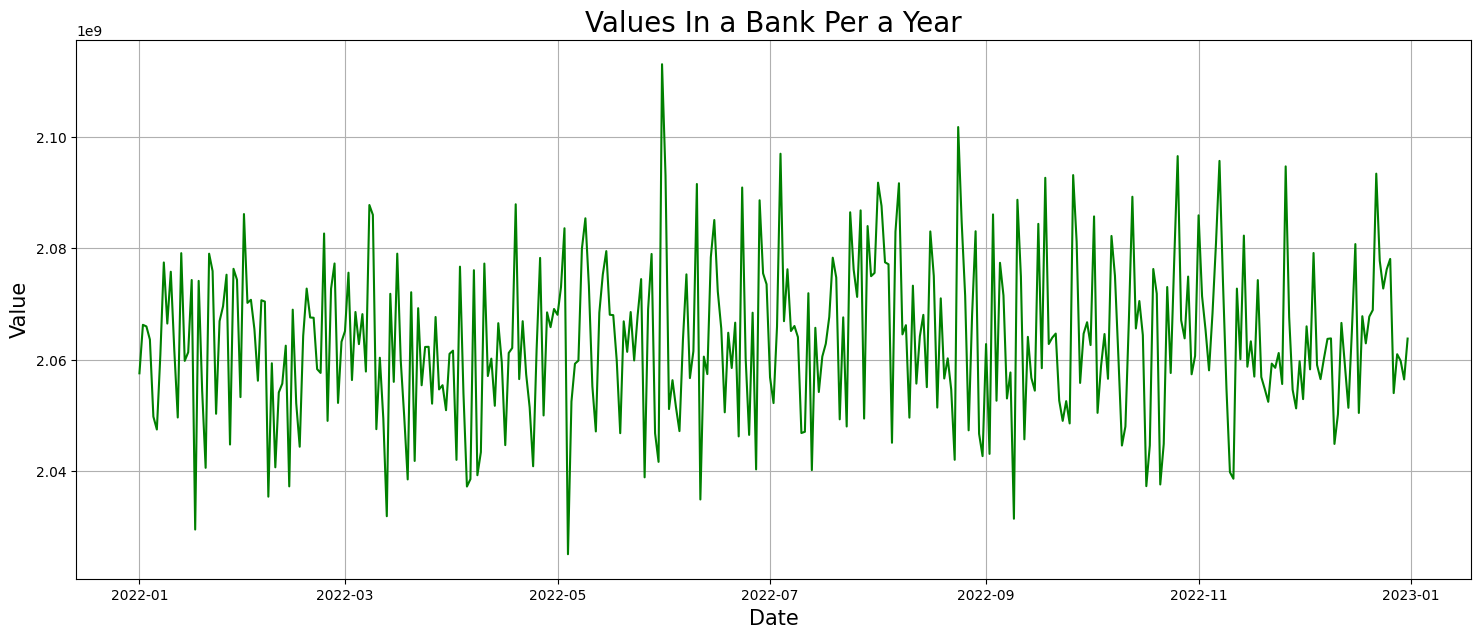

In [25]:
plt.figure(figsize=(18, 7))
sns.lineplot(data = all_values, x = "Date", y = "Value", color = "green")
plt.title("Values In a Bank Per a Year", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Value", fontsize = 15)
plt.grid()
plt.show()

## Overall View At Transactions Per a Year.

In [26]:
all_transactions = df.groupby("Date")["Transaction_count"].sum().reset_index()

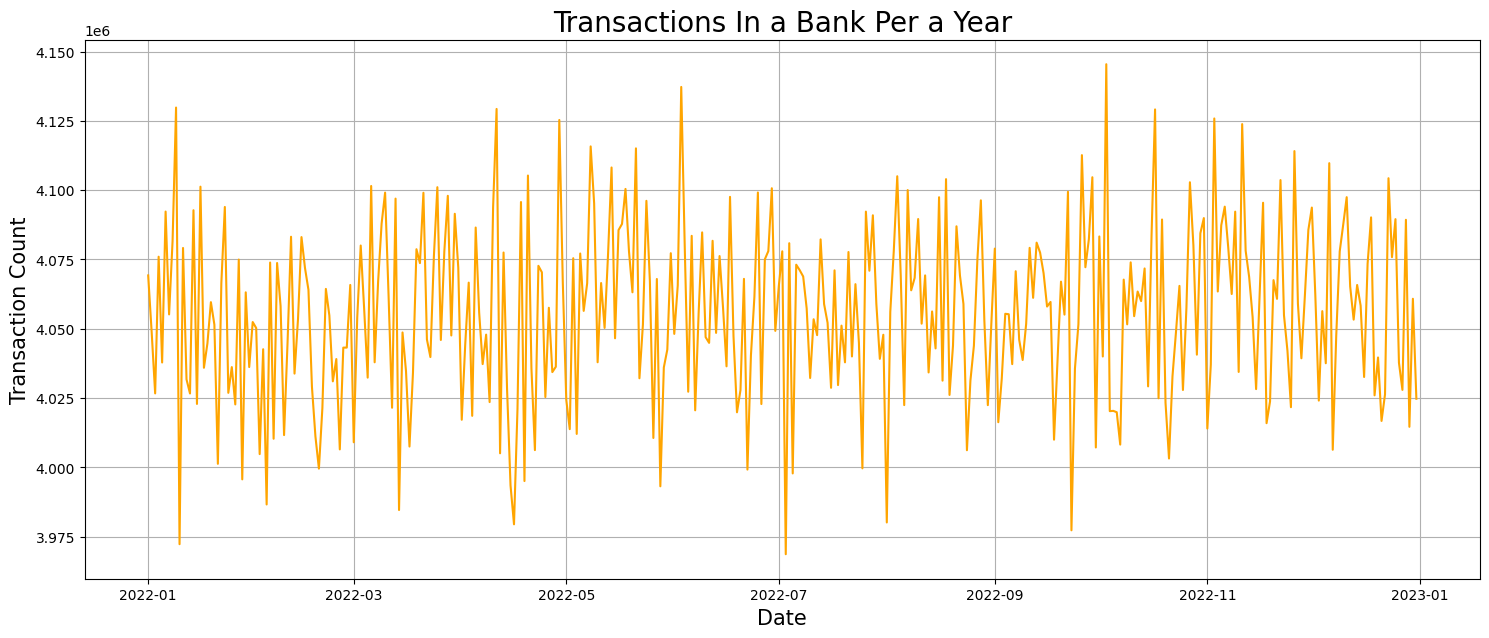

In [27]:
plt.figure(figsize=(18, 7))
sns.lineplot(data = all_transactions, x = "Date", y = "Transaction_count", color = "orange")
plt.title("Transactions In a Bank Per a Year", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Transaction Count", fontsize = 15)
plt.grid()
plt.show()

## Compare Values From Different Domains.

Let's sum values by their domains and compare them.

In [28]:
sum_values = df.groupby("Domain")["Value"].sum()
print (sum_values)
print ("The max value is : ", sum_values.max())
print ("The max value is : ", sum_values.min())

Domain
0    107658704394
1    107724396447
2    107613592821
3    107790980756
4    107791432924
5    107498499345
6    107129506265
Name: Value, dtype: int64
The max value is :  107791432924
The max value is :  107129506265


Now the datas are so huge! So I scale them into small datas. (-107 00 000 000) 

 Then we can plot them. Max data is from PUBLIC domain. Min data is from RETAIL domain.

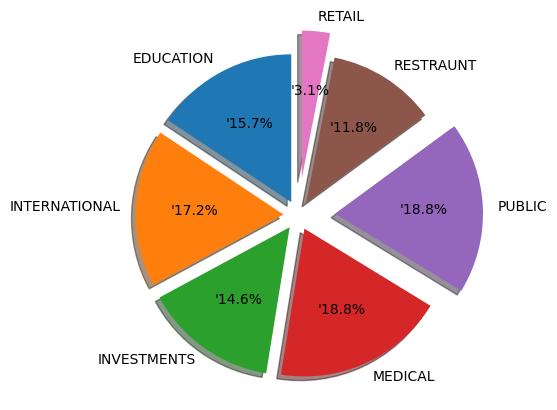

In [29]:
labels = "EDUCATION", "INTERNATIONAL", "INVESTMENTS", "MEDICAL", "PUBLIC", "RESTRAUNT", "RETAIL"
sizes = [658704394, 724396447, 613592821, 790980756, 791432924, 498499345, 129506265] 

fig, ax = plt.subplots()

explode = (0.1, 0.1, 0.1, 0.1, 0.25, 0.1 ,0.25)
ax.pie(sizes, explode= explode, labels = labels, autopct ="'%1.1f%%",shadow = True, startangle = 90)
plt.show()

## Compare Transactions From Different Domains With a Game!

Let's sum transaction count by their domains and compare them.

In [31]:
sum_transaction_count = df.groupby("Domain")["Transaction_count"].sum()
print (sum_transaction_count)

Domain
0    211454073
1    212147527
2    211532374
3    211186104
4    212214482
5    211232735
6    210643016
Name: Transaction_count, dtype: int64


Now the datas are so huge! So I scale them into small datas. (-210 000 000)

1st Let's compare (0-1-2) Transactions. I mean  education - international - investments.

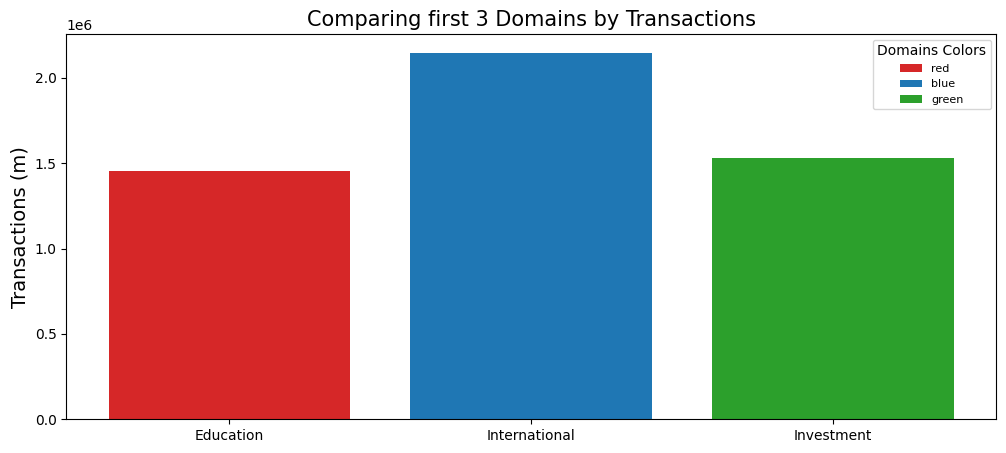

In [32]:
domains = ["Education", "International", "Investment"]
transaction_count = [1454073, 2147527, 1532374]
bar_labels = ["red", "blue", "green"]
bar_colors = ["tab:red", "tab:blue", "tab:green"]

plt.figure(figsize=(12, 5))
plt.bar(domains, transaction_count, label = bar_labels, color = bar_colors)
plt.title("Comparing first 3 Domains by Transactions", fontsize = 15)
plt.ylabel("Transactions (m)", fontsize = 14)
plt.legend(title= "Domains Colors", fontsize = 8)
plt.show()


International has more transactions. So It can go to final level. 

2nd Let's compare (4-5-6) Transactions. I mean public - restaurant - retail.

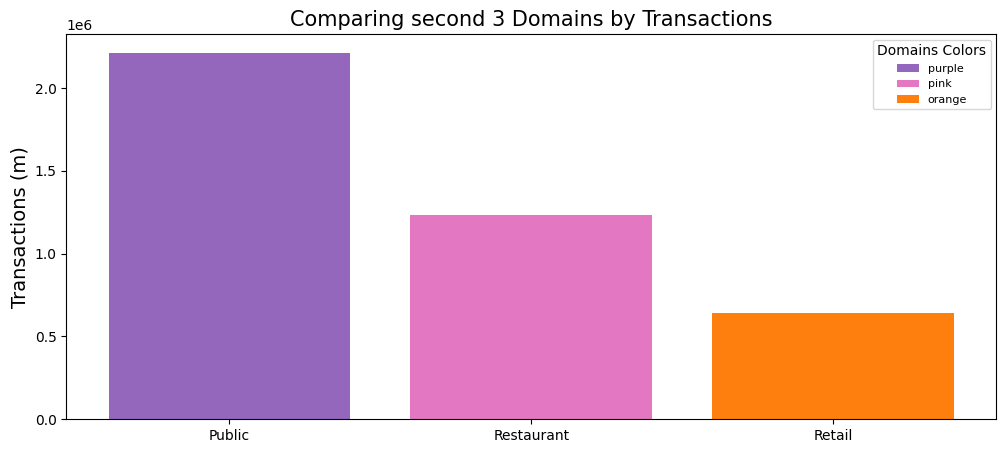

In [33]:
domains = ["Public", "Restaurant", "Retail"]
transaction_count = [2214482, 1232735, 643016]
bar_labels = ["purple", "pink", "orange"]
bar_colors = ["tab:purple", "tab:pink", "tab:orange"]

plt.figure(figsize=(12, 5))
plt.bar(domains, transaction_count, label = bar_labels, color = bar_colors)
plt.title("Comparing second 3 Domains by Transactions", fontsize = 15)
plt.ylabel("Transactions (m)", fontsize = 14)
plt.legend(title= "Domains Colors", fontsize = 8)
plt.show()

Public has more transactions. So It can go to final level.

Men and Gentlemen Welcome to final!! Let's compare (1-4-3) Transactions. I mean international - public - medical.

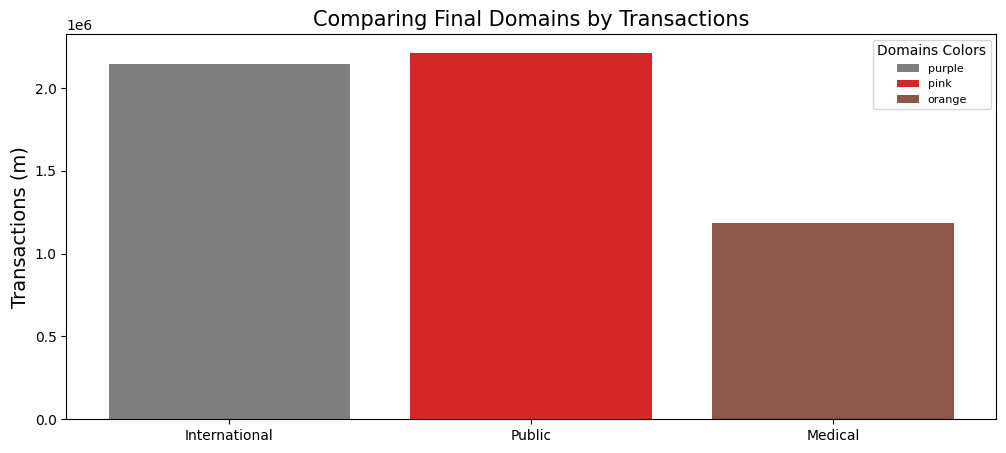

In [34]:
domains = ["International", "Public", "Medical"]
transaction_count = [2147527, 2214482, 1186104]
bar_labels = ["purple", "pink", "orange"]
bar_colors = ["tab:gray", "tab:red", "tab:brown"]

plt.figure(figsize=(12, 5))
plt.bar(domains, transaction_count, label = bar_labels, color = bar_colors)
plt.title("Comparing Final Domains by Transactions", fontsize = 15)
plt.ylabel("Transactions (m)", fontsize = 14)
plt.legend(title= "Domains Colors", fontsize = 8)
plt.show()

By all of these Three plots It is clear that Public Domain is the winner. It has the most Transactions in our bank.

## Compare Values in First half of year and Second half.

In [35]:
df_first_rows = df.head(498114)

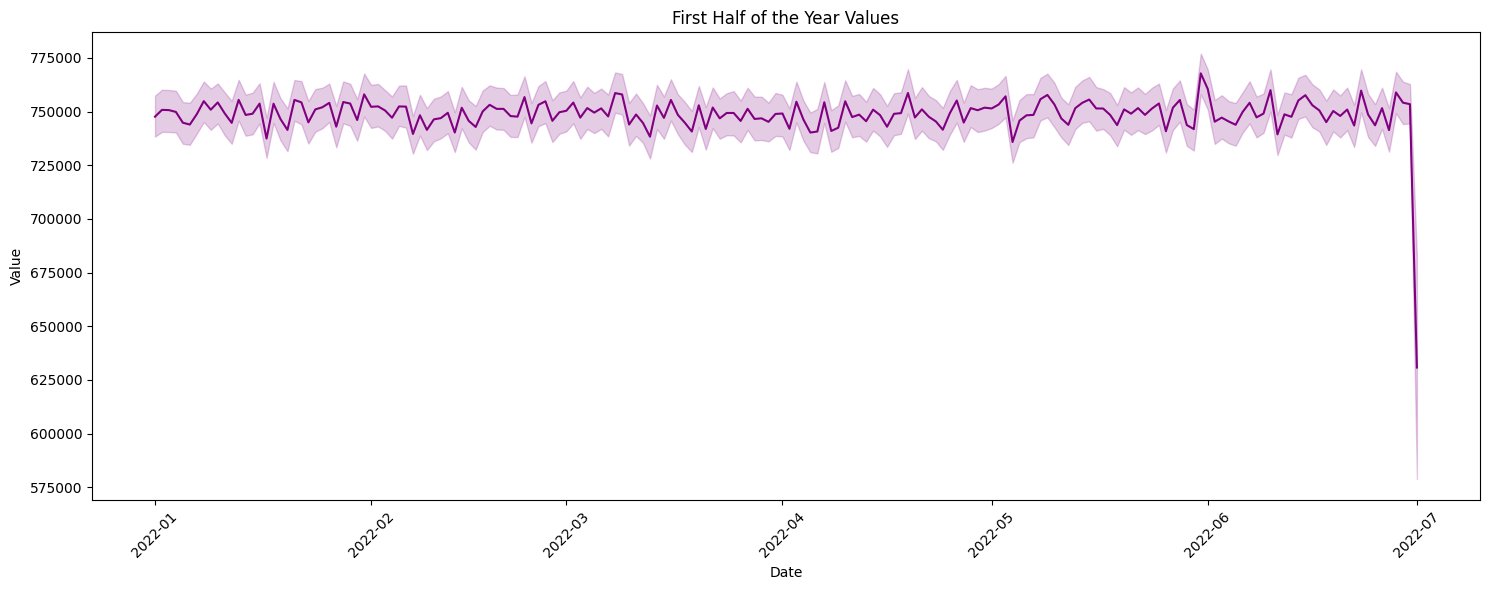

In [36]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = df_first_rows, x = "Date", y = "Value", color = "purple")

plt.title("First Half of the Year Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [37]:
df_first_rows = df.head(498114)

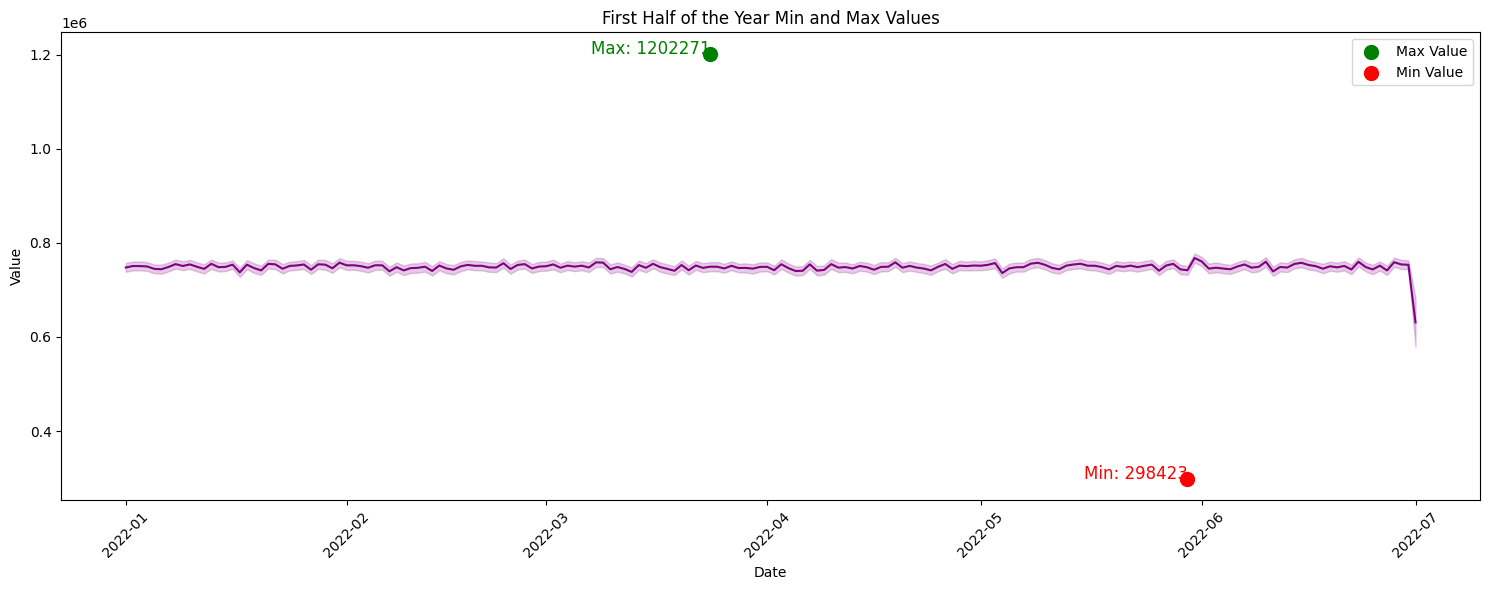

In [38]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = df_first_rows, x = "Date", y = "Value", color = "purple")

max_value = df_first_rows["Value"].max()
min_value = df_first_rows["Value"].min()
max_date = df_first_rows.loc[df_first_rows["Value"] == max_value, "Date"].values[0]
min_date = df_first_rows.loc[df_first_rows["Value"] == min_value, "Date"].values[0]

plt.scatter(max_date, max_value, color = "green", s = 100, label = "Max Value")
plt.text(max_date, max_value, f"Max: {max_value}", fontsize = 12, ha = "right", color = "green")

plt.scatter(min_date, min_value, color = "red", s = 100, label = "Min Value")
plt.text(min_date, min_value, f"Min: {min_value}", fontsize = 12, ha = "right", color = "red")

plt.title("First Half of the Year Min and Max Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
df_last_rows = df.tail(506368)

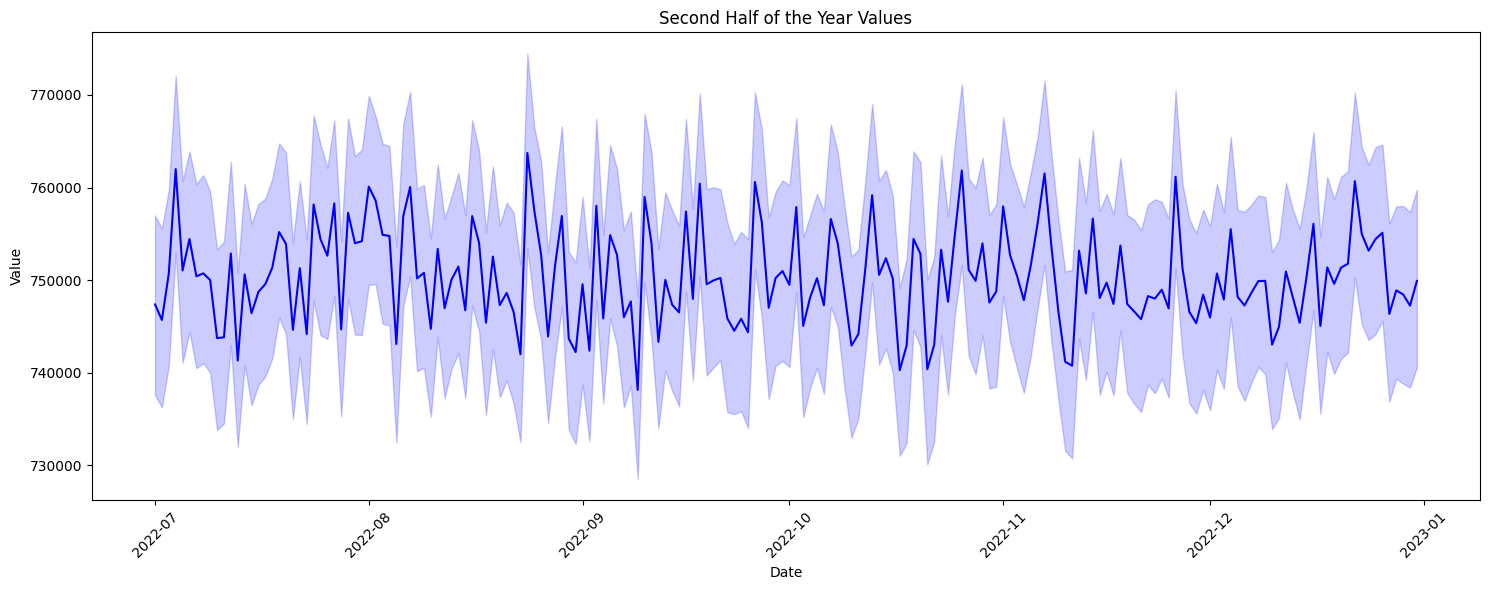

In [40]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = df_last_rows, x = "Date", y = "Value", color = "blue")

plt.title("Second Half of the Year Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [41]:
df_last_rows = df.tail(506368)

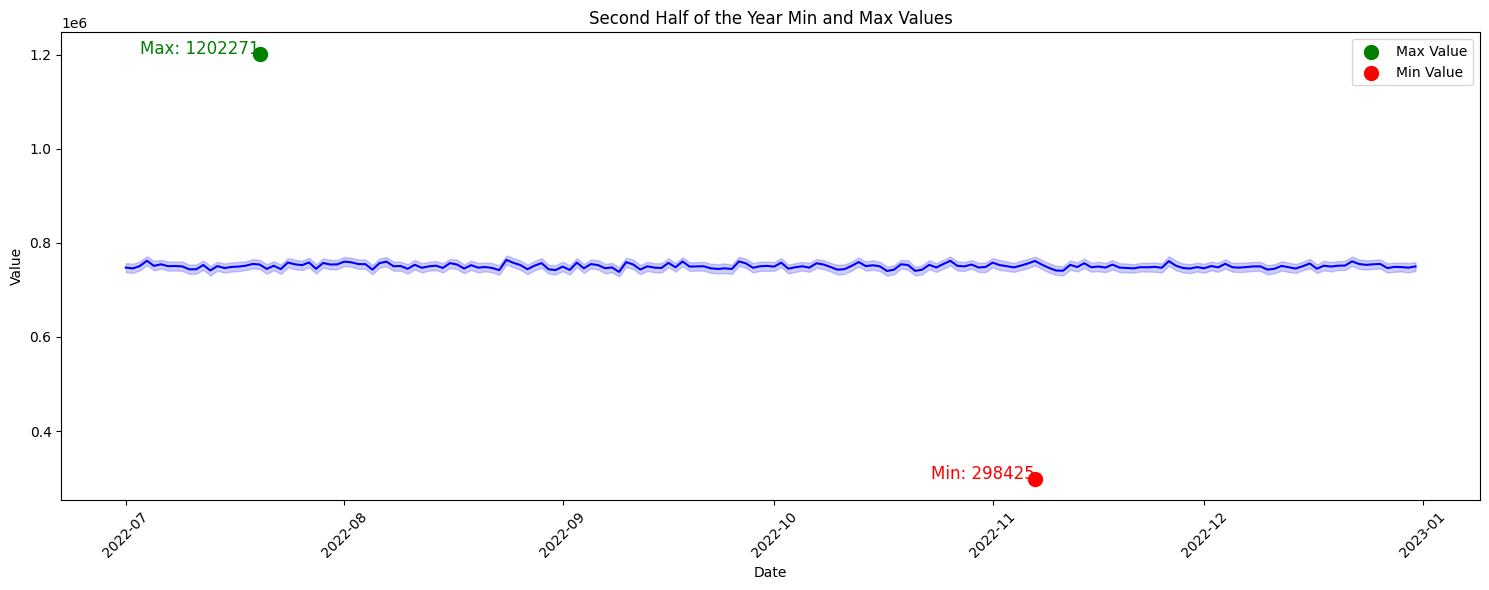

In [42]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = df_last_rows, x= "Date", y = "Value", color = "blue")

max_value = df_last_rows["Value"].max()
min_value = df_last_rows["Value"].min()
max_date = df_last_rows.loc[df_last_rows["Value"] == max_value, "Date"].values[0]
min_date = df_last_rows.loc[df_last_rows["Value"] == min_value, "Date"].values[0]

plt.scatter(max_date, max_value, color = "green", s = 100, label = "Max Value")
plt.text(max_date, max_value, f"Max: {max_value}", fontsize = 12, ha = "right", color = "green")

plt.scatter(min_date, min_value, color = "red", s = 100, label = "Min Value")
plt.text(min_date, min_value, f"Min: {min_value}", fontsize = 12, ha = "right", color = "red")

plt.title("Second Half of the Year Min and Max Values")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Compare Transactions In Every Season.

In [43]:
spring = df["Transaction_count"].iloc[0:247681].sum()
print(spring)

364627435


In [44]:
summer = df["Transaction_count"].iloc[247682:498113].sum()
print(summer)

369161017


In [45]:
fall = df["Transaction_count"].iloc[498114:751297].sum()
print(fall)

373102085


In [46]:
winter = df["Transaction_count"].iloc[751298:1004481].sum()
print(winter)

373515378


Now the datas are so huge! So I scale them into small datas. (-360 000 000)

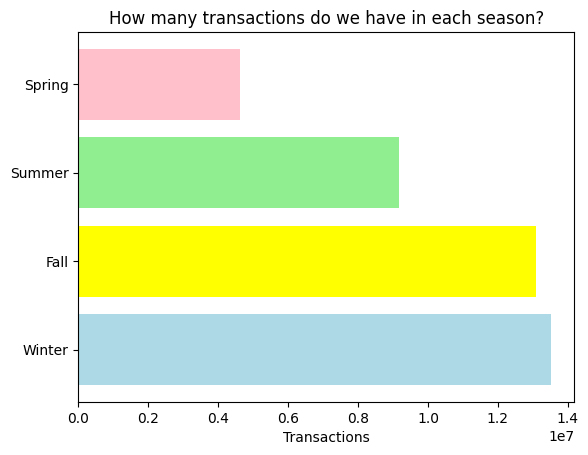

In [47]:
fig, ax = plt.subplots()

season = ["Spring", "Summer", "Fall", "Winter"]
colors = ["pink", "lightgreen", "yellow", "lightblue"]
transactions = [4627435, 9161017, 13102085, 13515378]
y_pos = np.arange(len(season))
error = np.random.rand(len(season))

ax.barh(y_pos, transactions, xerr = error, align = "center", color = colors)
ax.set_yticks(y_pos, labels=season)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Transactions")
ax.set_title("How many transactions do we have in each season?")
plt.show()

Wow! Most Transactions in this bank was in Winter.

## Compare Values and Transactions by Pairplots.

My dataset is huge. It take alot to have a pairplot on all of the datas. So let's have just a thousand of them.

In [48]:
df_sample = df.sample(10000)

Let's have Pairplots between Value and Transaction by their hue too.

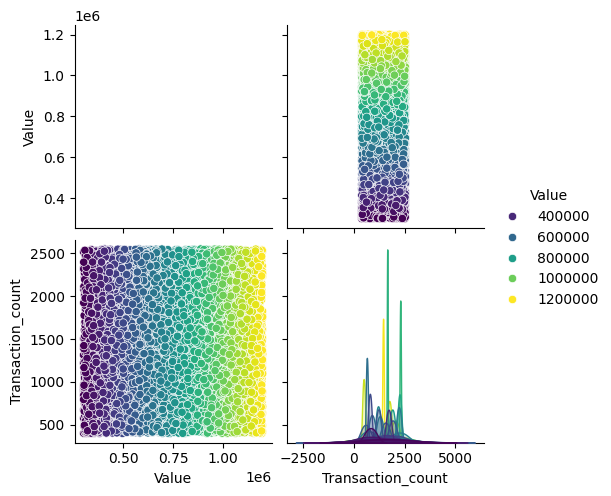

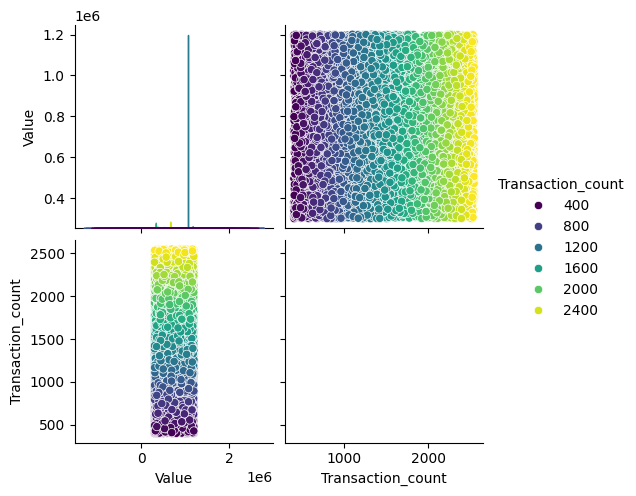

In [49]:
sns.pairplot(df_sample, vars = ["Value", "Transaction_count"], hue = "Value", palette = "viridis")
plt.show()

sns.pairplot(df_sample, vars = ["Value", "Transaction_count"], hue = "Transaction_count", palette = "viridis")
plt.show()

Let's have Pairplots between Value and Transaction by Domain hue too.

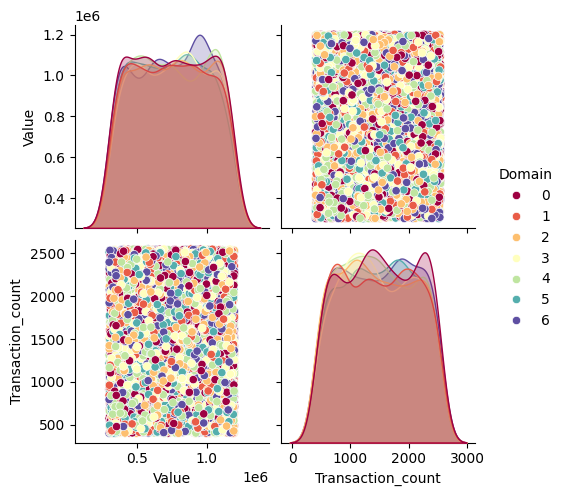

In [50]:
sns.pairplot(df_sample, vars = ["Value", "Transaction_count"], hue = "Domain", palette = "Spectral")
plt.show()

## Correlation between Values and Transactions.

In [51]:
correlation_matrix = df[["Value", "Transaction_count"]].corr()

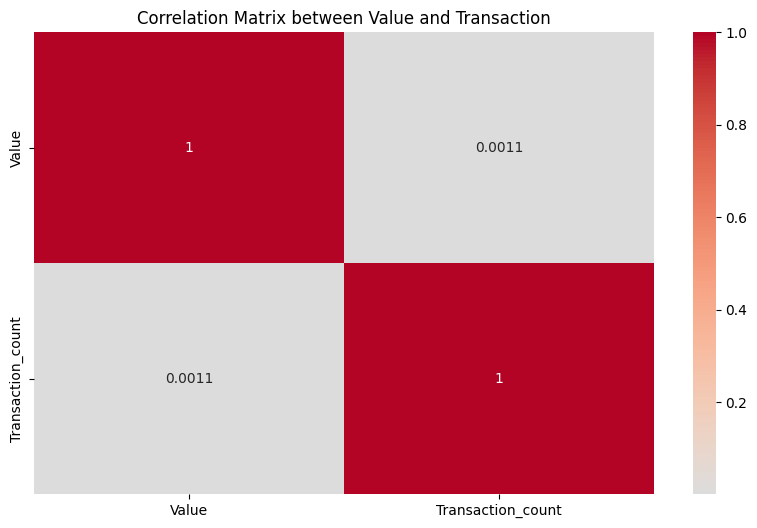

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "coolwarm", center = 0)
plt.title("Correlation Matrix between Value and Transaction")
plt.show()


## نتیجه گیری و صحبت کلی

 خب! مقایسه دیتاهای یک بانک فرضی در هند رو دیدیم که در سال 2022 شکل گرفته بود. چهار ویژگی داشت که تاریخ - نوع تراکنش - ارزش تراکنش و تعداد تراکنش ها و معاملات بودند. همچنین ستون نوع تراکنش
 پس از تبدیل انکدینگ به 7 تا عدد تبدیل شد(0-6). پس از محسبات و تبدیلات برای نرمال سازی داده ها به نمودار رسیدیم.
 

به ترتیب کار و نمودار ها نتیجه گیری ها را داریم :

لاین پلات : نگاهی به کل ارزش ها و تعداد معاملات انداختیم و نتیجه میگیریم که کاملا نوسان دارند و قابل مقایسه با یکدیگر نیستند.

پای پلات : ارزش های معاملات رو بر اساس نوع انها دسته بندی و روی نمودار نشان دادیم و نتیجه میگیریم که ارزش تراکنش عمومی از همه انها بیشتر هست

بار پلات : مانند مسابقه اول سه نوع ابتدا و بعد سه نوع اخر و در اخر سه نوع وسط را بر اساس تعداد معاملات انجام شده مقایسه کردیم و نتیجه میگیریم که باز هم نوع عمومی از همه تعداد معامله بیشتری داشته است. 

لاین پلات : ارزش معاملات را در شش ماهه اول سال و شش ماهه دوم سال مقایسه و روی نمودار نشان دادیم و حداقل و حداکثر ارزش را هم مشخص کردیم.

هاریزنتال پلات : تعداد معاملات را در هر فصل با توجه به تعداد ردیف های انها (هر روز2752 دیتا) انتخاب و نمودار بار کشیدیم و نتیجه میگیریم که در فصل زمستان یعنی اخرین فصل تعدد معاملات انجام شده بیشتر از فصل های دیگر است.

پیر پلات یک : در دو نمودار اول ارزش های معاملات با تعداد انها مقایسه می شود و نتیجه میگیریم که ارزش و تعداد هر کدام مقدار گسسته ای را دارند و قابل مقایسه با یکدیگر نیستند. در ضمن هر دو پلات یکسان هستند فقط طول و عرض جا به جا شدند.

پیر پلات دو : در نمودار سوم ارزش و تعداد بر حسب نوع انها مقایسه شدند و نتیجه میگیریم که توزیع داده ها متفاوت هستند. ولی به نظر می رسد که پابلیک پراکندگی بیشتری دارد اما داده های ریتیل تمرکز و تجمع بیشتری دارند.

ماتریس همبستگی : با توجه به عدد کوریلیشین ها می توان گفت هر ستون به خودش کاملا وابسته است چون عدد ان 1 هست اما ارزش و تعداد معاملات هم با توجه به ماتریس همبستگی کاملا همبسته و غیرقابل مقایسه هستند زیرا عدد وابستگی انها بسیار کم یعنی 0.0011 است.